<a href="https://colab.research.google.com/github/HiroshiATakano/GitHub/blob/master/Python%E3%81%A7%E5%A7%8B%E3%82%81%E3%82%8B%E6%95%B0%E7%90%86%E6%9C%80%E9%81%A9%E5%8C%96.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
import os

path = os.getcwd()

try:
  os.chdir(path + "/drive/My Drive/Pythonで始める数理最適化")
except:
  pass

os.getcwd()

'/content/drive/My Drive/Pythonで始める数理最適化'

In [ ]:
!pip install japanize-matplotlib

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import japanize_matplotlib
import pandas as pd

import gspread

from google.colab import auth
auth.authenticate_user()

from google.auth import default
creds, _ = default()

gc = gspread.authorize(creds)

from gspread_dataframe import get_as_dataframe, set_with_dataframe

url = "https://docs.google.com/spreadsheets/d/1Ma7ehT4TAnkUwJjspP-C3mwJA1hYmbJr8B9GJSFI0lU/edit?usp=sharing"
ss = gc.open_by_url(url)


In [ ]:
%pip install mip
%pip install pulp

  Using cached PuLP-3.0.2-py3-none-any.whl.metadata (6.7 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.7/17.7 MB 39.3 MB/s eta 0:00:00


In [ ]:
!pip install japanize-matplotlib

In [ ]:
%reset -f

In [ ]:
import pulp
import numpy as np
import matplotlib.pyplot as plt
import japanize_matplotlib

#連立一次方程式

In [ ]:
# 連立方程式の係数行列と定数ベクトル
# 120x + 150y = 1440
# x + y = 10
A = np.array([[120, 150], [1, 1]])
B = np.array([1440, 10])

# 連立方程式を解く
solution = np.linalg.solve(A, B)
x, y = solution

print(f"解: x = {x}, y = {y}")

解: x = 2.0, y = 8.0


In [ ]:
from mip import Model, xsum, BINARY, OptimizationStatus

# モデルの定義
model = Model(sense=1)  # 最小化問題として設定（ダミー目的関数）

# 変数の定義
x = model.add_var(name="x", lb=0)
y = model.add_var(name="y", lb=0)

# 制約条件
model += 120 * x + 150 * y == 1440, "Constraint_1"
model += x + y == 10, "Constraint_2"

# ダミー目的関数（解を求めるためだけに設定）
model.objective = xsum([0])

# 問題を解く
status = model.optimize()

# 解の取得
if status == OptimizationStatus.OPTIMAL:
    x_value = x.x
    y_value = y.x
    print(f"解: x = {x_value}, y = {y_value}")
else:
    print("解が見つかりませんでした。")


解: x = 2.000000000000002, y = 7.999999999999998


In [ ]:
from pulp import LpProblem, LpVariable, LpMaximize, value

# 問題の定義
problem = LpProblem("Linear_Equation_Solution", LpMaximize)

# 変数の定義
x = LpVariable("x", lowBound=0)
y = LpVariable("y", lowBound=0)

# 制約条件
problem += 120 * x + 150 * y == 1440, "Constraint_1"
problem += x + y == 10, "Constraint_2"

# 目的関数（ダミー、解を求めるだけなのでゼロに設定）
problem += 0, "Objective_Function"

# 問題を解く
problem.solve()

# 解の取得
x_value = value(x)
y_value = value(y)

print(f"解: x = {x_value}, y = {y_value}")


解: x = 2.0, y = 8.0


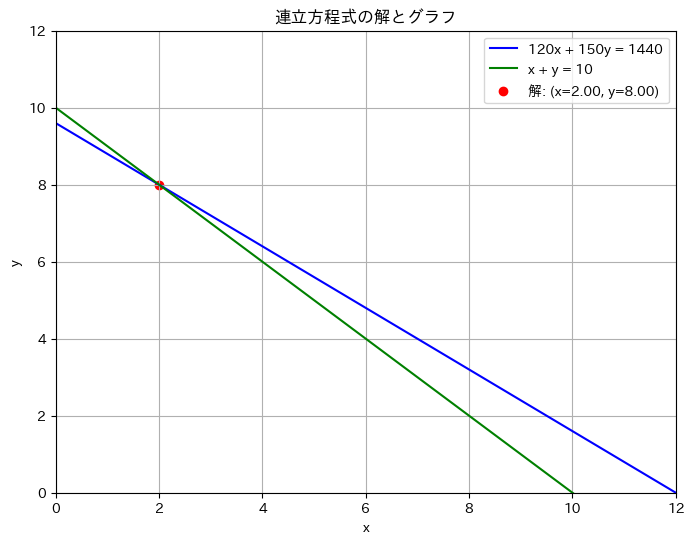

In [ ]:
# グラフの描画
x_vals = np.linspace(0, 12, 400)

# 2つの方程式をyについて解く
y1 = (1440 - 120 * x_vals) / 150
y2 = 10 - x_vals

plt.figure(figsize=(8, 6))

# 各方程式のグラフを描画
plt.plot(x_vals, y1, label="120x + 150y = 1440", color="blue")
plt.plot(x_vals, y2, label="x + y = 10", color="green")

# 解のポイントをプロット
plt.scatter(x_value, y_value, color="red", label=f"解: (x={x_value:.2f}, y={y_value:.2f})")

# グラフの装飾
plt.axhline(0, color="black", linewidth=0.5, linestyle="--")
plt.axvline(0, color="black", linewidth=0.5, linestyle="--")
plt.xlim(0, 12)
plt.ylim(0, 12)
plt.xlabel("x")
plt.ylabel("y")
plt.title("連立方程式の解とグラフ")
plt.legend()
plt.grid()

plt.show()

#線形計画問題



In [ ]:
problem = pulp.LpProblem('LP', pulp.LpMaximize)

x = pulp.LpVariable('x', cat='Continuous', lowBound=0)
y = pulp.LpVariable('y', cat='Continuous', lowBound=0)

problem += 1*x + 3*y <= 30
problem += 2*x + 1*y <= 40

problem += x + 2*y

status = problem.solve()

print('Status:', pulp.LpStatus[status])
print('x = ', x.value(), 'y = ', y.value(), 'obj = ', problem.objective.value())

Status: Optimal
x =  18.0 y =  4.0 obj =  26.0


In [ ]:
import pandas as pd

data ={'m':['m1','m2'],'stock':[30,40]}
df = pd.DataFrame(data)

df.to_csv('stocks_1.csv', index=False)

In [ ]:
stock_df = pd.read_csv('stocks_1.csv')
gain_df = pd.read_csv('gains_1.csv')
require_df = pd.read_csv('requires_1.csv')

M = stock_df['m'].tolist()
P = gain_df['p'].tolist()

stock = stock_df.set_index('m')['stock'].to_dict()
gain = gain_df.set_index('p')['gain'].to_dict()
require = require_df.set_index(['p','m'])['require'].to_dict()

problem = pulp.LpProblem('LP', pulp.LpMaximize)

x = pulp.LpVariable.dict('x', P, cat='Continuous', lowBound=0)

for m in M:
  problem += pulp.lpSum([require[p,m]*x[p] for p in P]) <= stock[m]

problem += pulp.lpSum([gain[p]*x[p] for p in P])

status = problem.solve()

print('Status:', pulp.LpStatus[status])

for p in P:
  print(p, x[p].value())

print('obj=', problem.objective.value())

Status: Optimal
p1 18.0
p2 4.0
obj= 26.0


最適解: 製品p = 18.0kg, 製品q = 4.0kg
最大利益: 26.0万円


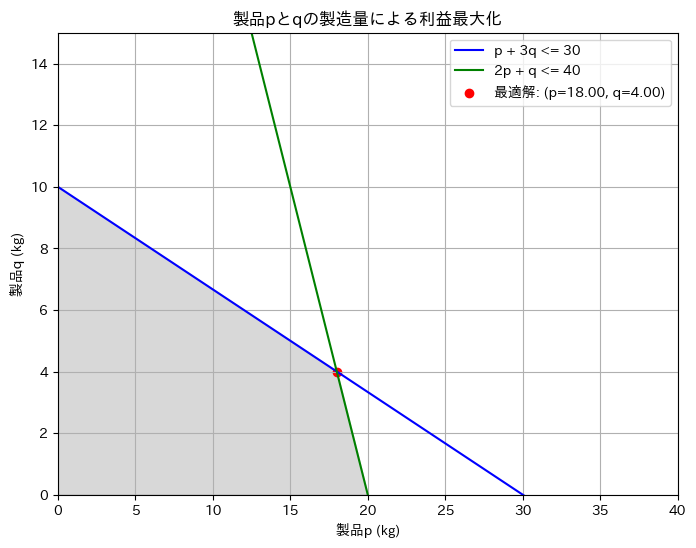

In [ ]:
from pulp import LpProblem, LpVariable, LpMaximize, value

# 問題の定義
problem = LpProblem("Maximize_Profit", LpMaximize)

# 変数の定義
p = LpVariable("p", lowBound=0, cat='Continuous')  # 製品pの製造量
q = LpVariable("q", lowBound=0, cat='Continuous')  # 製品qの製造量

# 制約条件
problem += p + 3 * q <= 30, "Material_m"  # 原料mの制約
problem += 2 * p + q <= 40, "Material_n"  # 原料nの制約

# 目的関数
problem += p * 1 + q * 2, "Profit"  # 利益の最大化

# 問題を解く
problem.solve()

# 解の取得
p_value = value(p)
q_value = value(q)
profit = value(problem.objective)

print(f"最適解: 製品p = {p_value}kg, 製品q = {q_value}kg")
print(f"最大利益: {profit}万円")

# グラフの描画
p_vals = np.linspace(0, 40, 400)

# 制約条件の直線を計算
q1 = (30 - p_vals) / 3  # p + 3q <= 30
q2 = 40 - 2 * p_vals  # 2p + q <= 40

# グラフの描画
plt.figure(figsize=(8, 6))
plt.plot(p_vals, q1, label="p + 3q <= 30", color="blue")
plt.plot(p_vals, q2, label="2p + q <= 40", color="green")

# 領域を塗りつぶす
plt.fill_between(p_vals, np.minimum(q1, q2), 0, where=(np.minimum(q1, q2) >= 0), color="gray", alpha=0.3)

# 解のポイントをプロット
plt.scatter(p_value, q_value, color="red", label=f"最適解: (p={p_value:.2f}, q={q_value:.2f})")

# グラフの装飾
plt.axhline(0, color="black", linewidth=0.5, linestyle="--")
plt.axvline(0, color="black", linewidth=0.5, linestyle="--")
plt.xlim(0, 40)
plt.ylim(0, 15)
plt.xlabel("製品p (kg)")
plt.ylabel("製品q (kg)")
plt.title("製品pとqの製造量による利益最大化")
plt.legend()
plt.grid()

plt.show()


In [ ]:
import gspread

from google.colab import auth
auth.authenticate_user()

from google.auth import default
creds, _ = default()

gc = gspread.authorize(creds)

from gspread_dataframe import get_as_dataframe, set_with_dataframe


url = "https://docs.google.com/spreadsheets/d/1Ma7ehT4TAnkUwJjspP-C3mwJA1hYmbJr8B9GJSFI0lU/edit?usp=sharing"
ss = gc.open_by_url(url)

# Obtener los datos (como lista)
st = ss.worksheet("Sheet4")
list_of_lists = st.get_all_values()

df = pd.DataFrame.from_records(list_of_lists)
df.columns = df.iloc[0]
df = df.drop(index=0)

# Establecer la primera columna como índice
df = df.set_index(df.columns[0])
df = df.apply(pd.to_numeric)
df

,X,Y,Stock
,,,
A,3,3,48.0
B,1,6,36.0
Venefit,10,20,NaN


In [ ]:
P = df.columns[:2].to_list()
M = df.index[:2].to_list()
stock = dict(df['Stock'][:2])
gain = dict(df.loc['Venefit'][:2])
require = {(p, m): df.loc[m, p] for p in P for m in M}

x = {}
for p in P:
  x[p] = pulp.LpVariable(p, lowBound=0, cat='Continuous')

In [ ]:
problem = pulp.LpProblem("Maximize_gain", pulp.LpMaximize)

for m in M:
  for p in P:
    problem += pulp.lpSum([require[(p,m)] * x[p] for p in P]) <= stock[m]

problem += pulp.lpSum([gain[p]*x[p] for p in P])

status = problem.solve()
print(pulp.LpStatus[status])

Optimal


In [ ]:
for p in P:
  print(p, x[p].value())
print("obj=", problem.objective.value())

X 12.0
Y 4.0
obj= 200.0


In [ ]:
# データ処理のためのライブラリpandasとPythonライブラリPuLPの取り込み
import pandas as pd
import pulp

In [ ]:
# stocks.csvからのデータ取得
stock_df = pd.read_csv('2.tutorial/stocks.csv')
stock_df

,m,stock
0,m1,35
1,m2,22
2,m3,27


In [ ]:
require_df = pd.read_csv('2.tutorial/requires.csv')
require_df

,p,m,require
0,p1,m1,2
1,p1,m2,0
2,p1,m3,1
3,p2,m1,3
4,p2,m2,2
5,p2,m3,0
6,p3,m1,0
7,p3,m2,2
8,p3,m3,2
9,p4,m1,2


In [ ]:
gain_df = pd.read_csv('2.tutorial/gains.csv')
gain_df

,p,gain
0,p1,3
1,p2,4
2,p3,4
3,p4,5


In [ ]:
P = gain_df['p'].tolist()
P

['p1', 'p2', 'p3', 'p4']

In [ ]:
M = stock_df['m'].tolist()
M

['m1', 'm2', 'm3']

In [ ]:
stock = {row.m:row.stock for row in stock_df.itertuples()}
stock

{'m1': 35, 'm2': 22, 'm3': 27}

In [ ]:
require = {(row.p, row.m):row.require for row in require_df.itertuples()}
require

{('p1', 'm1'): 2,
 ('p1', 'm2'): 0,
 ('p1', 'm3'): 1,
 ('p2', 'm1'): 3,
 ('p2', 'm2'): 2,
 ('p2', 'm3'): 0,
 ('p3', 'm1'): 0,
 ('p3', 'm2'): 2,
 ('p3', 'm3'): 2,
 ('p4', 'm1'): 2,
 ('p4', 'm2'): 2,
 ('p4', 'm3'): 2}

In [ ]:
gain = {row.p:row.gain for row in gain_df.itertuples()}
gain

{'p1': 3, 'p2': 4, 'p3': 4, 'p4': 5}

In [ ]:
problem = pulp.LpProblem('LP2', pulp.LpMaximize)

In [ ]:
stock = dict(zip(stock_df['m'], stock_df['stock']))
stock

{'m1': 35, 'm2': 22, 'm3': 27}

In [ ]:
stock = dict((row.m, row.stock) for row in stock_df.itertuples())
stock

{'m1': 35, 'm2': 22, 'm3': 27}

In [ ]:
stock = stock_df.set_index(['m'])['stock'].to_dict()
stock

{'m1': 35, 'm2': 22, 'm3': 27}

In [ ]:
require = {(row.p, row.m): row.require for row in require_df.itertuples()}
require

{('p1', 'm1'): 2,
 ('p1', 'm2'): 0,
 ('p1', 'm3'): 1,
 ('p2', 'm1'): 3,
 ('p2', 'm2'): 2,
 ('p2', 'm3'): 0,
 ('p3', 'm1'): 0,
 ('p3', 'm2'): 2,
 ('p3', 'm3'): 2,
 ('p4', 'm1'): 2,
 ('p4', 'm2'): 2,
 ('p4', 'm3'): 2}

In [ ]:
require = require_df.set_index(['p', 'm'])['require'].to_dict()
require

{('p1', 'm1'): 2,
 ('p1', 'm2'): 0,
 ('p1', 'm3'): 1,
 ('p2', 'm1'): 3,
 ('p2', 'm2'): 2,
 ('p2', 'm3'): 0,
 ('p3', 'm1'): 0,
 ('p3', 'm2'): 2,
 ('p3', 'm3'): 2,
 ('p4', 'm1'): 2,
 ('p4', 'm2'): 2,
 ('p4', 'm3'): 2}

In [ ]:
gain = gain_df.set_index(['p'])['gain'].to_dict()
gain

{'p1': 3, 'p2': 4, 'p3': 4, 'p4': 5}

In [ ]:
gain = {row.p:row.gain for row in gain_df.itertuples()}
gain

{'p1': 3, 'p2': 4, 'p3': 4, 'p4': 5}

In [ ]:
#　線形計画問題の定義
problem = pulp.LpProblem('LP2', pulp.LpMaximize)
problem

LP2:
MAXIMIZE
None
VARIABLES

In [ ]:
# 変数の定義 整数計算問題は安定して解くことは期待できない
x = pulp.LpVariable.dicts("x", P, lowBound=0, cat='Continuous')
x

{'p1': x_p1, 'p2': x_p2, 'p3': x_p3, 'p4': x_p4}

In [ ]:
x = {}
for p in P:
  x[p] = pulp.LpVariable('x_{}'.format(p), lowBound=0, cat='Continuous')
x

{'p1': x_p1, 'p2': x_p2, 'p3': x_p3, 'p4': x_p4}

In [ ]:
x = {p:pulp.LpVariable(f'x_{p}', lowBound=0, cat='Continuous') for p in P}
x

{'p1': x_p1, 'p2': x_p2, 'p3': x_p3, 'p4': x_p4}

In [ ]:
# 制約式の定義 lowBound=0と定義したので製品pの生産量は０以上は不要
#for p in P:
#  print(x[p])
#  problem += x[p] >= 0

In [ ]:
# 生産量は在庫の範囲で行うという制約

for m in M:
  print(m)
  for p in P:
    print(require[p,m], x[p])
  problem += pulp.lpSum([require[p,m]*x[p] for p in P]) <= stock[m]

m1
2 x_p1
3 x_p2
0 x_p3
2 x_p4
m2
0 x_p1
2 x_p2
2 x_p3
2 x_p4
m3
1 x_p1
0 x_p2
2 x_p3
2 x_p4


In [ ]:
# 目的関数の定義
problem += pulp.lpSum([gain[p]*x[p] for p in P])

In [ ]:
problem

LP2:
MAXIMIZE
3*x_p1 + 4*x_p2 + 4*x_p3 + 5*x_p4 + 0.0
SUBJECT TO
_C1: 2 x_p1 + 3 x_p2 + 2 x_p4 <= 35

_C2: 2 x_p2 + 2 x_p3 + 2 x_p4 <= 22

_C3: x_p1 + 2 x_p3 + 2 x_p4 <= 27

VARIABLES
x_p1 Continuous
x_p2 Continuous
x_p3 Continuous
x_p4 Continuous

In [ ]:
status = problem.solve()
print('status', pulp.LpStatus[status])

status Optimal


In [ ]:
for p in P:
  print(p, x[p].value())

print('obj=', problem.objective.value())

p1 12.142857
p2 3.5714286
p3 7.4285714
p4 0.0
obj= 80.42857099999999


#学校のクラス編成

In [ ]:
s_df = pd.read_csv('3.school/students.csv')
s_pair_df = pd.read_csv('3.school/student_pairs.csv')

クラス編成問題
1. 学年の全生徒をそれぞれ一つのクラスに割り当てる
2. 各クラスの生徒の人数は39人以上、40人以下
3. 各クラスの男子生徒、女子生徒の人数は20人以下とする
4. 各クラスの学力試験の平均点は学年平均±10点とする
5. 各クラスにリーダー気質の生徒を２人以上割り当てる
6. 特別な支援が必要な生徒は各クラスに一人以下とする
7. 特別ペアの生徒は同一クラスに割り当てない



In [ ]:
import pulp

prob = pulp.LpProblem('ClassAssignmentProblem', pulp.LpMaximize)
prob

ClassAssignmentProblem:
MAXIMIZE
None
VARIABLES

In [ ]:
# 生徒のリスト
S = s_df['student_id'].tolist()

# クラスのリスト
C = list("ABCDEFGH")

# 生徒とクラスのペアのリスト
SC = [(s,c) for s in S for c in C]

# 生徒をどのクラスに割り当てるかを変数として定義
x = pulp.LpVariable.dicts('x', SC, cat='Binary')

In [ ]:
# 各生徒は一つのクラスに割り当てる
for s in S:
  prob += pulp.lpSum([x[s,c] for c in C]) == 1

In [ ]:
# 各クラスの生徒の人数は３９人以上、４０人以下とする
for c in C:
  prob += pulp.lpSum([x[s,c] for s in S]) >= 39
  prob += pulp.lpSum([x[s,c] for s in S]) <= 40

In [ ]:
# 男子生徒のリスト
S_male = [row.student_id for row in s_df.itertuples() if row.gender == 1]
S_male = s_df[s_df['gender']==1]['student_id'].tolist()

In [ ]:
# 女子生徒のリスト
S_female = [row.student_id for row in s_df.itertuples() if row.gender == 0]
S_female = s_df[s_df['gender']==0]['student_id'].tolist()
len(S_female)

160

In [ ]:
# 各クラスの男子生徒、女子生徒の人数は20人以下とする
for c in C:
  prob += pulp.lpSum([x[s,c] for s in S_male]) <= 20
  prob += pulp.lpSum([x[s,c] for s in S_female]) <= 20

In [ ]:
# 学力を辞書表現に変換
score = { row.student_id:row.score for row in s_df.itertuples()}
score = s_df.set_index(s_df['student_id'])['score'].to_dict()

# 平均点の算出
score_mean = s_df['score'].mean()

# 各クラスの学力試験の平均点は学年平均点±10点とする
for c in C:
  prob += (score_mean - 10)*pulp.lpSum([x[s,c] for s in S]) <= pulp.lpSum([x[s,c]*score[s] for s in S])
  prob += pulp.lpSum([x[s,c]*score[s] for s in S]) <= (score_mean + 10)*pulp.lpSum([x[s,c] for s in S])

In [ ]:
# リーダー気質の生徒の集合
S_leader = s_df[s_df['leader_flag']==1]['student_id'].to_list()
S_leader

[13, 28, 42, 74, 86, 88, 121, 138, 160, 184, 188, 220, 228, 248, 277, 284, 309]

In [ ]:
# 各クラスにリーダー気質の生徒を２人以上割り当てる
for c in C:
  prob += pulp.lpSum([x[s,c] for s in S_leader]) >= 2

In [ ]:
# 特別な支援が必要な生徒の集合
S_support = s_df[s_df['support_flag']==1]['student_id'].to_list()
S_support

[27, 78, 263, 280]

In [ ]:
# 特別な支援が必要な生徒は各クラスに１人以下とする
for c in C:
  prob += pulp.lpSum([x[s,c] for s in S_support]) <= 1

In [ ]:
# 生徒の特定ペアリスト

SS = [(row.student_id1, row.student_id2) for row in s_pair_df.itertuples()]
SS

[(118, 189), (72, 50), (314, 233)]

In [ ]:
# 特定ペアの生徒は同一クラスに割り当てない

for s1, s2 in SS:
  for c in C:
    prob += x[s1,c] + x[s2,c] <= 1

In [ ]:
# 初期クラス編成のデータを作成
# 学力をもとに順位を付与

s_df['score_rank'] = s_df['score'].rank(ascending=False, method='first')

# 学力順にクラス編成し、init_assigned_classカラムを作成

class_dic = {0:'A', 1:'B', 2:'C', 3:'D', 4:'E', 5:'F', 6:'G', 7:'H'}
s_df['init_assigned_class'] = s_df['score_rank'].map(lambda x:x % 8).map(class_dic)


In [ ]:
# init_flagを作成
init_flag = {(s,c):0 for s in S for c in C}

for row in s_df.itertuples():
  init_flag[row.student_id, row.init_assigned_class] = 1

In [ ]:
# 目的関数：初期クラス編成とできるだけ一致させる。
prob += pulp.lpSum([x[s,c] * init_flag[s,c] for s,c in SC])

In [ ]:
status = prob.solve()
print(status)
print(pulp.LpStatus[status])

1
Optimal


In [ ]:
# 最適化結果の表示
C2Ss = {}
for c in C:
  C2Ss[c] = [s for s in S if x[s,c].value()==1]

for c, Ss in C2Ss.items():
  print('Class:',c)
  print('Num:', len(Ss))
  print('Student:',Ss)
  print('')

Class: A
Num: 40
Student: [2, 23, 56, 68, 76, 82, 89, 102, 106, 113, 115, 121, 123, 124, 127, 140, 172, 173, 185, 186, 204, 210, 228, 255, 267, 273, 274, 280, 285, 288, 289, 292, 295, 297, 304, 308, 311, 313, 316, 318]

Class: B
Num: 39
Student: [11, 14, 17, 30, 32, 35, 41, 49, 64, 66, 79, 83, 86, 88, 97, 114, 119, 122, 132, 134, 141, 149, 151, 165, 175, 178, 190, 198, 200, 209, 213, 216, 226, 237, 272, 296, 303, 306, 307]

Class: C
Num: 40
Student: [21, 38, 44, 46, 51, 54, 62, 63, 73, 75, 84, 85, 99, 120, 138, 142, 143, 144, 150, 166, 183, 184, 192, 193, 195, 201, 205, 207, 211, 212, 217, 221, 222, 243, 244, 263, 264, 287, 299, 315]

Class: D
Num: 40
Student: [5, 24, 39, 47, 50, 61, 67, 74, 90, 92, 93, 100, 109, 116, 131, 136, 147, 152, 155, 167, 169, 170, 176, 177, 196, 199, 214, 218, 219, 227, 230, 231, 236, 238, 239, 253, 257, 259, 271, 309]

Class: E
Num: 39
Student: [4, 8, 12, 13, 19, 22, 33, 43, 48, 55, 57, 59, 98, 112, 125, 130, 133, 137, 139, 153, 160, 189, 203, 234, 235, 240,

In [ ]:
# 検証用のデータフレームの用意
result_df2 = s_df.copy()

# 各生徒がどのクラスに割り当てられたかの情報を辞書に格納
S2C = {s:c for s in S for c in C if x[s,c].value() == 1}

# 生徒データに各生徒がどのクラスに割り当てらたかの情報を結合
result_df2['assigned_class'] = result_df2['student_id'].map(S2C)
result_df2

,student_id,gender,leader_flag,support_flag,score,score_rank,init_assigned_class,assigned_class
0,1,0,0,0,335,109.0,F,F
1,2,1,0,0,379,38.0,G,A
2,3,0,0,0,350,79.0,H,H
3,4,0,0,0,301,172.0,E,E
4,5,1,0,0,317,147.0,D,D
...,...,...,...,...,...,...,...,...
313,314,0,0,0,244,263.0,H,G
314,315,1,0,0,309,162.0,C,C
315,316,0,0,0,239,272.0,A,A
316,317,1,0,0,356,63.0,H,H


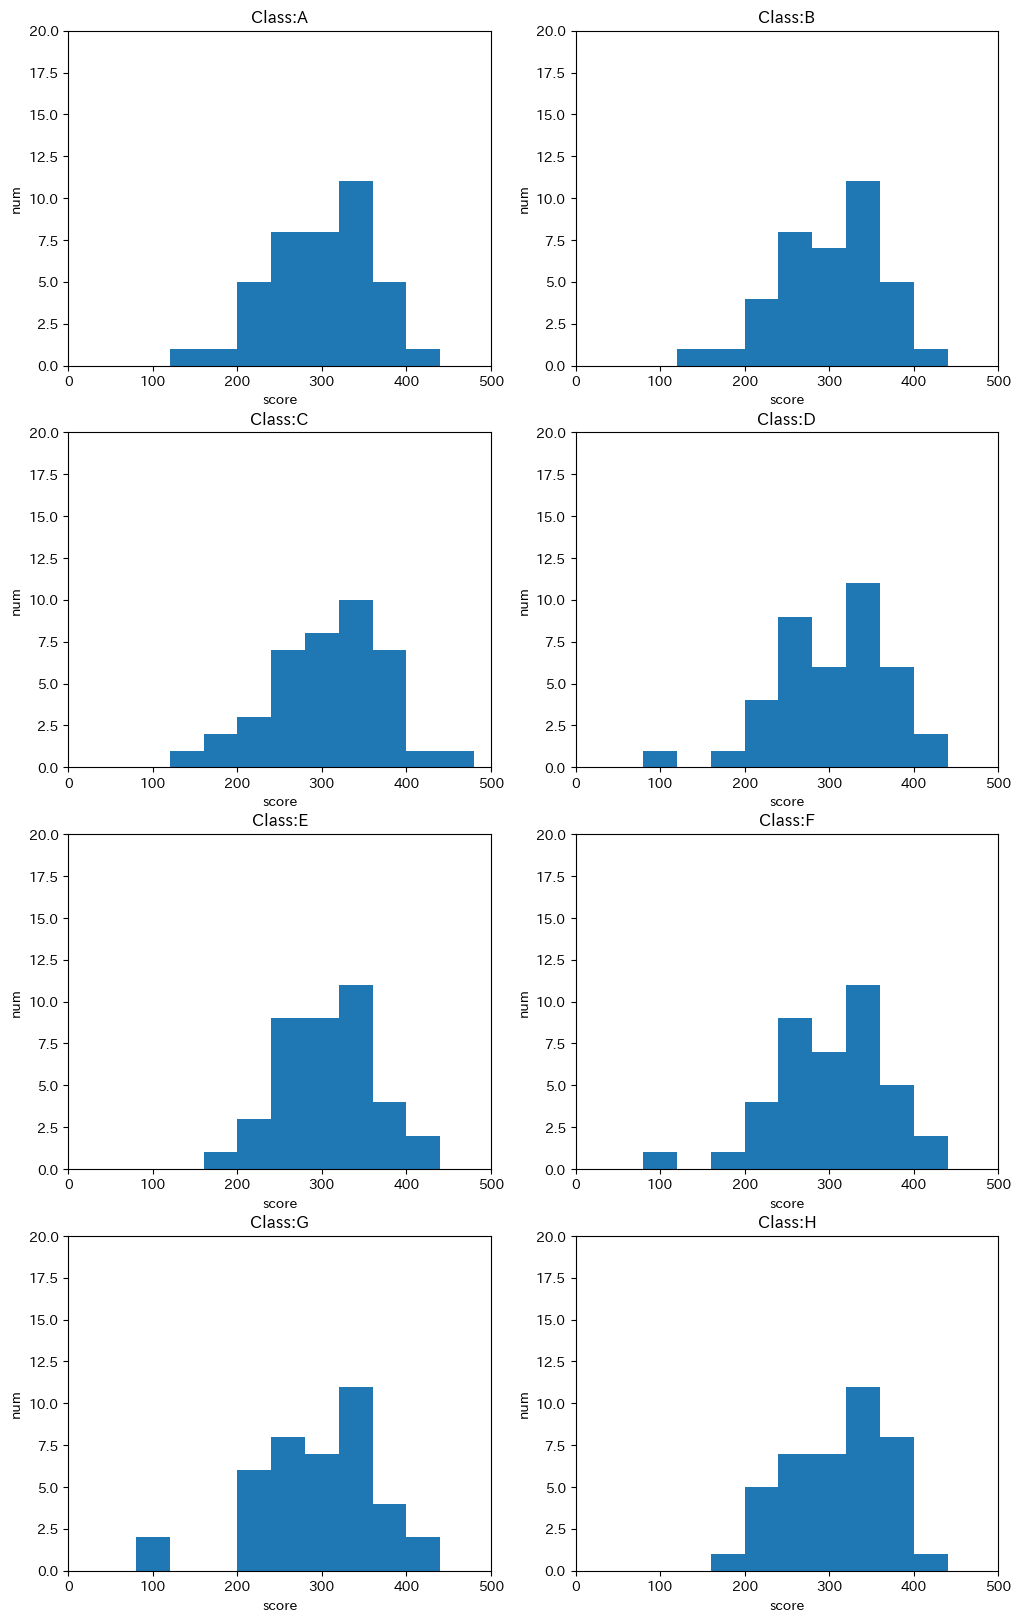

In [ ]:
fig = plt.figure(figsize=(12,20))
for i, c in enumerate(C):
  cls_df = result_df2[result_df2['assigned_class']==c]
  ax = fig.add_subplot(4
                       , 2
                       , i+1
                       , xlabel='score'
                       , ylabel='num'
                       , xlim=(0,500)
                       , ylim=(0,20)
                       , title='Class:{:s}'.format(c)
                       )
  ax.hist(cls_df['score'], bins=range(0,500,40))

In [ ]:
for s in S:
  assigned_class = [x[s,c].value() for c in C if x[s,c].value()==1]

  if len(assigned_class) != 1:
    print('error')

In [ ]:
result_df = s_df.copy()

S2C = {s:c for s in S for c in C if x[s,c].value()==1}

result_df2['assigned_class'] = result_df2['student_id'].map(S2C)

result_df2

,student_id,gender,leader_flag,support_flag,score,score_rank,init_assigned_class,assigned_class
0,1,0,0,0,335,109.0,F,F
1,2,1,0,0,379,38.0,G,A
2,3,0,0,0,350,79.0,H,H
3,4,0,0,0,301,172.0,E,E
4,5,1,0,0,317,147.0,D,D
...,...,...,...,...,...,...,...,...
313,314,0,0,0,244,263.0,H,G
314,315,1,0,0,309,162.0,C,C
315,316,0,0,0,239,272.0,A,A
316,317,1,0,0,356,63.0,H,H


In [ ]:
result_df2.groupby('assigned_class')['student_id'].count()

,student_id
assigned_class,
A,40
B,39
C,40
D,40
E,39
F,40
G,40
H,40


In [ ]:
result_df2.groupby(['assigned_class','gender'])['student_id'].count()

assigned_class  gender
A               0         20
                1         20
B               0         20
                1         19
C               0         20
                1         20
D               0         20
                1         20
E               0         20
                1         19
F               0         20
                1         20
G               0         20
                1         20
H               0         20
                1         20
Name: student_id, dtype: int64

In [ ]:
result_df2.groupby(['assigned_class'])['score'].mean()

,score
assigned_class,
A,298.150000
B,304.282051
C,307.125000
D,306.250000
E,307.051282
F,301.975000
G,294.375000
H,310.050000


In [ ]:
result_df2.groupby(['assigned_class'])['leader_flag'].sum()

,leader_flag
assigned_class,
A,2
B,2
C,2
D,2
E,2
F,3
G,2
H,2


In [ ]:
result_df2.groupby(['assigned_class'])['support_flag'].sum()

,support_flag
assigned_class,
A,1
B,0
C,1
D,0
E,0
F,1
G,1
H,0


In [ ]:
for i, (s1, s2) in enumerate(SS):
  print('case:', i)
  c1 = S2C[s1]
  c2 = S2C[s2]
  print('s1:{}-{}'.format(s1, c1))
  print('s2:{}-{}'.format(s2, c2))
  print('')

case: 0
s1:118-F
s2:189-E

case: 1
s1:72-H
s2:50-D

case: 2
s1:314-G
s2:233-H



In [ ]:
import matplotlib.pyplot as plt

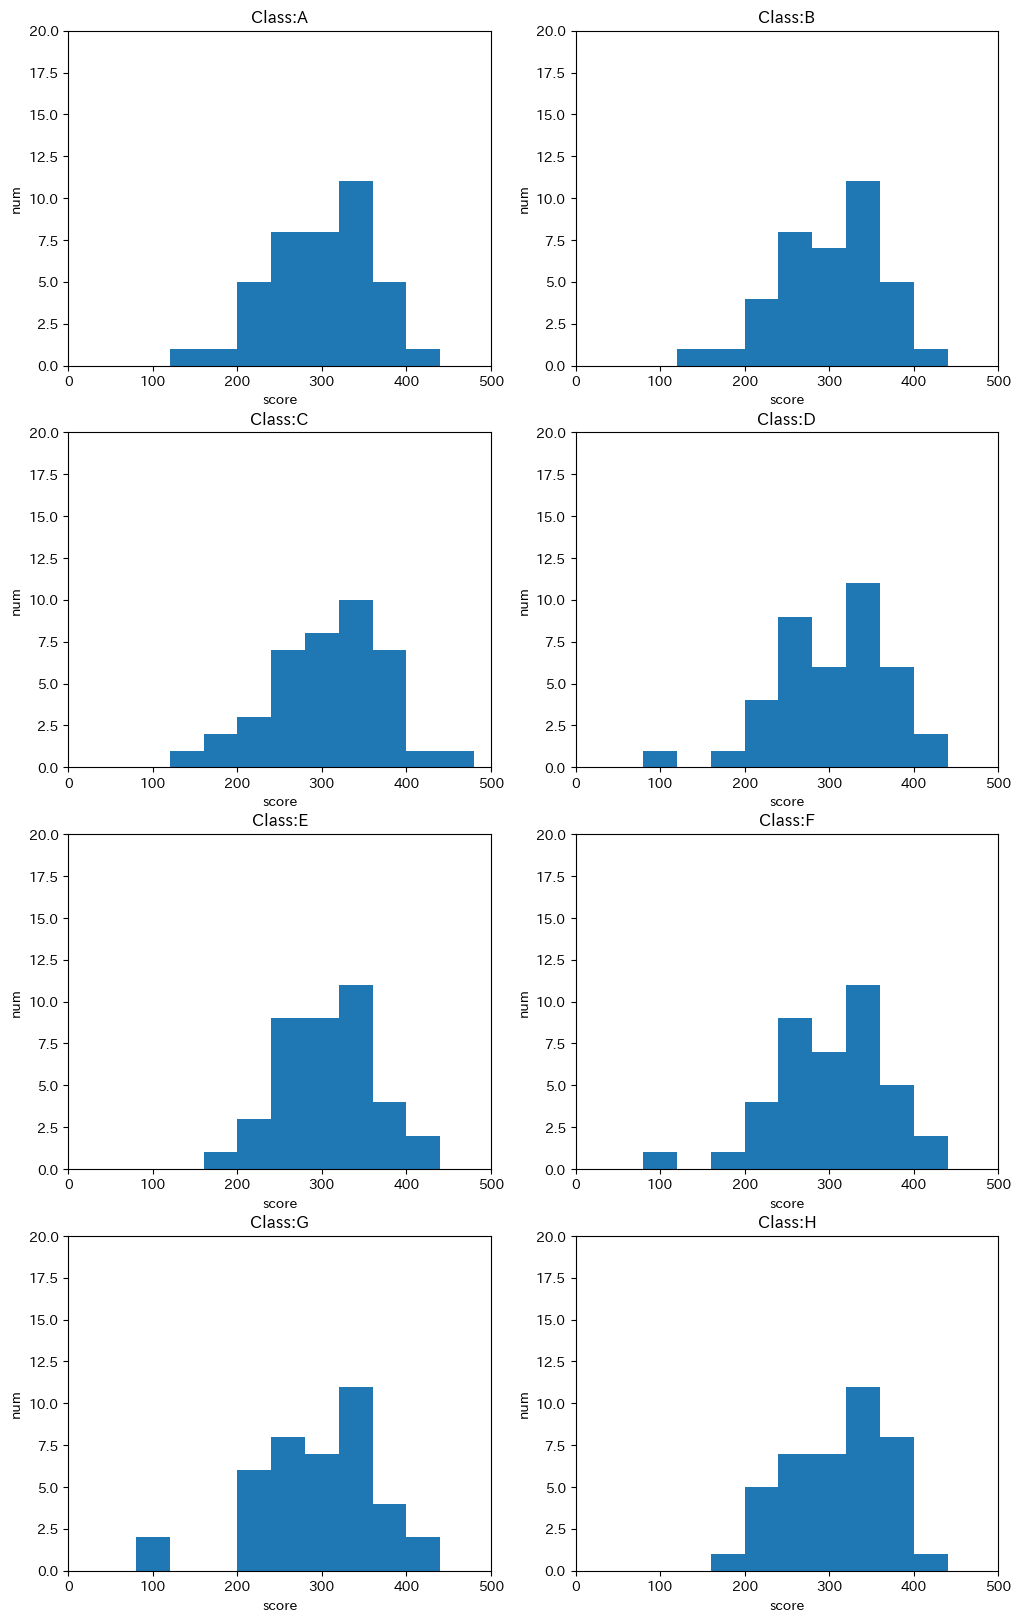

In [ ]:
fig = plt.figure(figsize=(12,20))
for i, c in enumerate(C):
  cls_df = result_df2[result_df2['assigned_class']==c]
  ax = fig.add_subplot(4
                       , 2
                       , i+1
                       , xlabel='score'
                       , ylabel='num'
                       , xlim=(0,500)
                       , ylim=(0,20)
                       , title='Class:{:s}'.format(c)
                       )
  ax.hist(cls_df['score'], bins=range(0,500,40))


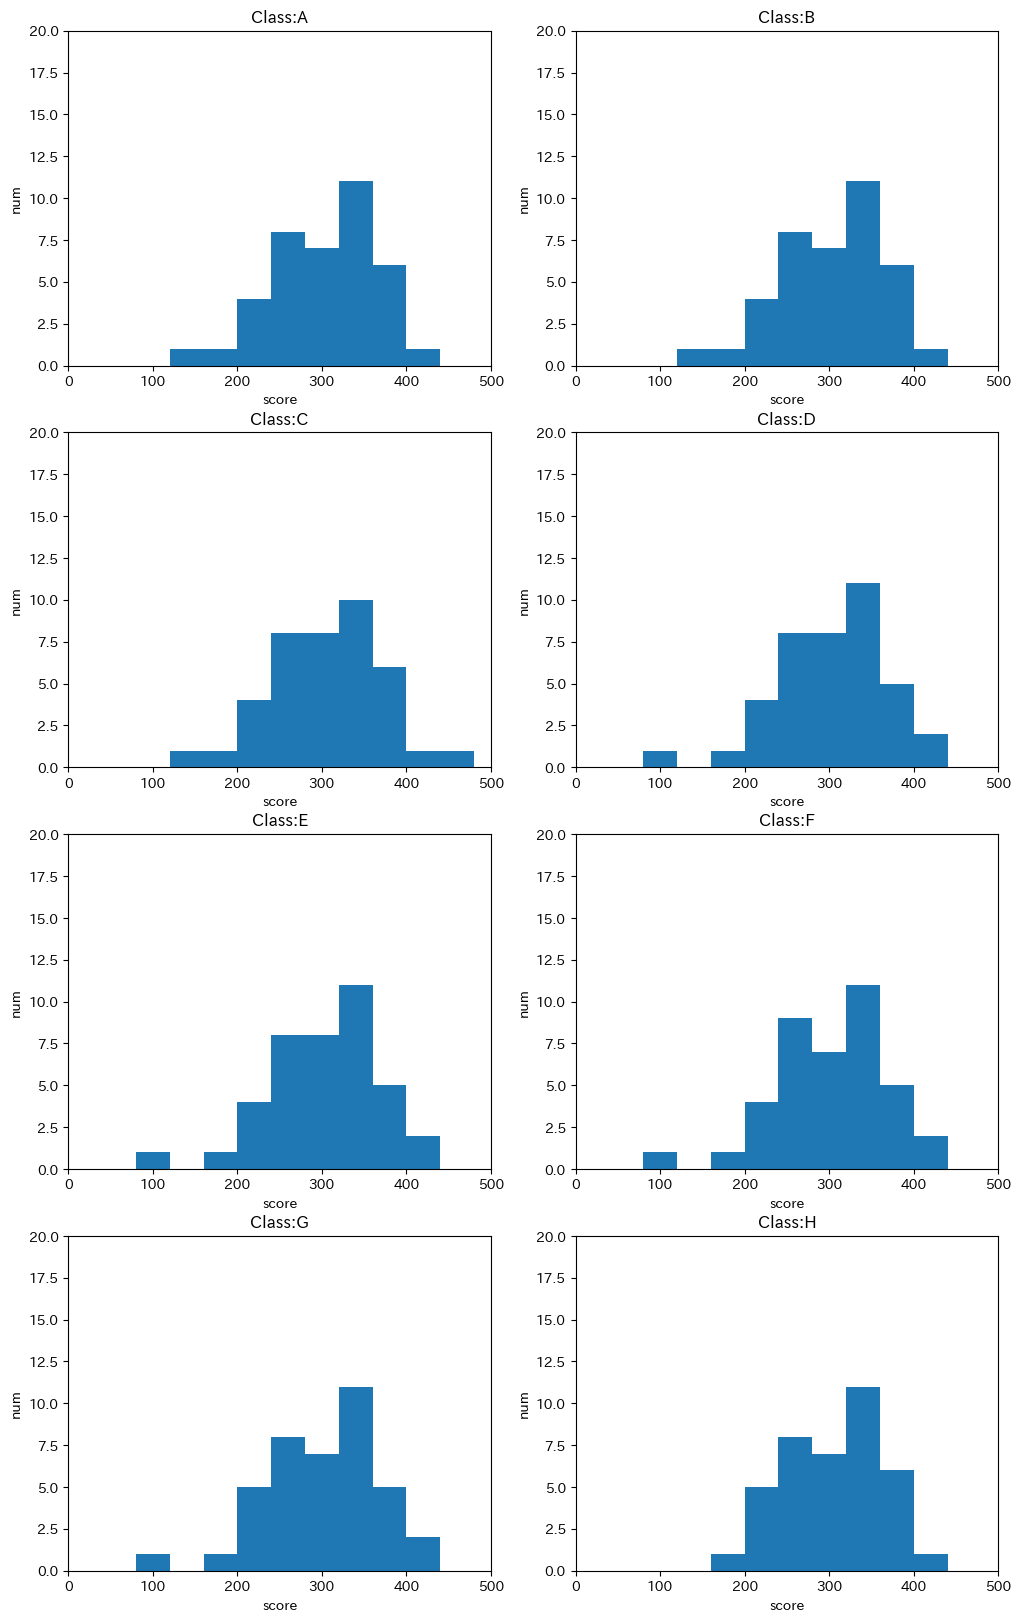

In [ ]:
fig = plt.figure(figsize=(12,20))
for i, c in enumerate(C):
  cls_df = s_df[s_df['init_assigned_class']==c]
  ax = fig.add_subplot(4
                       , 2
                       , i+1
                       , xlabel='score'
                       , ylabel='num'
                       , xlim=(0,500)
                       , ylim=(0,20)
                       , title='Class:{:s}'.format(c)
                       )
  ax.hist(cls_df['score'], bins=range(0,500,40))

In [ ]:
import pandas as pd

s_df = pd.read_csv('3.school/students.csv')
s_df

,student_id,gender,leader_flag,support_flag,score
0,1,0,0,0,335
1,2,1,0,0,379
2,3,0,0,0,350
3,4,0,0,0,301
4,5,1,0,0,317
...,...,...,...,...,...
313,314,0,0,0,244
314,315,1,0,0,309
315,316,0,0,0,239
316,317,1,0,0,356


In [ ]:
s_df.describe()

,student_id,gender,leader_flag,support_flag,score
count,318.000000,318.000000,318.000000,318.000000,318.000000
mean,159.500000,0.496855,0.053459,0.012579,303.644654
std,91.942917,0.500778,0.225302,0.111622,65.179995
min,1.000000,0.000000,0.000000,0.000000,88.000000
25%,80.250000,0.000000,0.000000,0.000000,261.000000
50%,159.500000,0.000000,0.000000,0.000000,310.000000
75%,238.750000,1.000000,0.000000,0.000000,350.000000
max,318.000000,1.000000,1.000000,1.000000,485.000000


In [ ]:
s_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318 entries, 0 to 317
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   student_id    318 non-null    int64
 1   gender        318 non-null    int64
 2   leader_flag   318 non-null    int64
 3   support_flag  318 non-null    int64
 4   score         318 non-null    int64
dtypes: int64(5)
memory usage: 12.6 KB


In [ ]:
s_df.student_id.duplicated().any()

False

In [ ]:
s_df.gender.value_counts()

,count
gender,
0,160
1,158


In [ ]:
s_df.score

,score
0,335
1,379
2,350
3,301
4,317
...,...
313,244
314,309
315,239
316,356


(array([ 6.,  3.,  9., 43., 62., 70., 73., 39., 12.,  1.]),
 array([ 88. , 127.7, 167.4, 207.1, 246.8, 286.5, 326.2, 365.9, 405.6,
        445.3, 485. ]),
 <BarContainer object of 10 artists>)

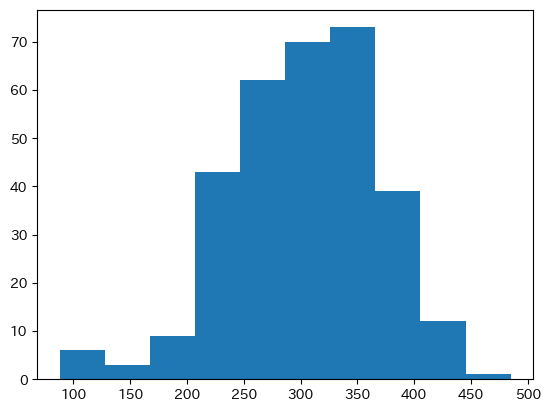

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

plt.hist(s_df.score)

((array([-2.85125752, -2.55661446, -2.38992689, -2.27121734, -2.17786724,
         -2.1003505 , -2.0337172 , -1.97505229, -1.92248855, -1.87475519,
         -1.83094664, -1.79039393, -1.75258829, -1.7171334 , -1.68371429,
         -1.65207631, -1.62201053, -1.59334333, -1.56592879, -1.53964305,
         -1.51438002, -1.49004813, -1.46656775, -1.44386918, -1.42189108,
         -1.40057911, -1.37988496, -1.35976543, -1.34018175, -1.32109898,
         -1.30248554, -1.28431272, -1.26655443, -1.24918682, -1.23218804,
         -1.21553805, -1.19921837, -1.18321199, -1.16750314, -1.15207723,
         -1.13692071, -1.12202095, -1.10736621, -1.0929455 , -1.07874857,
         -1.0647658 , -1.05098818, -1.03740721, -1.02401494, -1.01080386,
         -0.99776689, -0.98489732, -0.97218885, -0.95963548, -0.94723155,
         -0.93497167, -0.92285074, -0.91086389, -0.89900651, -0.88727421,
         -0.87566278, -0.86416822, -0.85278673, -0.84151465, -0.83034849,
         -0.81928492, -0.80832073, -0.

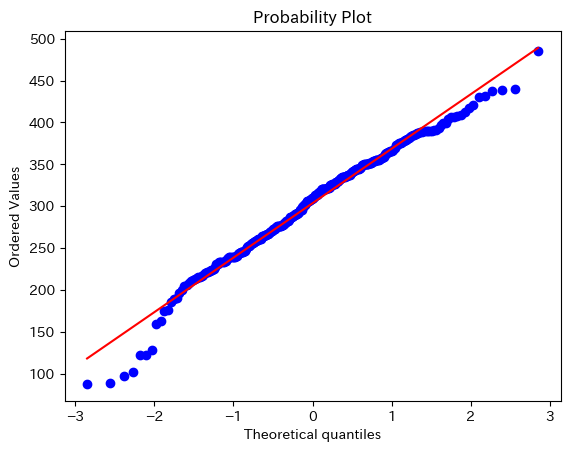

In [ ]:
from scipy import stats

stats.probplot(s_df.score, dist='norm', plot=plt)

In [ ]:
result1 = stats.shapiro(s_df.score)
result1

ShapiroResult(statistic=0.9826540910534906, pvalue=0.0006905943270307693)

In [ ]:
result2 = stats.ks_1samp(s_df.score, stats.norm.cdf)
result2

KstestResult(statistic=1.0, pvalue=0.0, statistic_location=88, statistic_sign=-1)

平均：　303.6点、標準偏差：65.1点
 *p=0.00


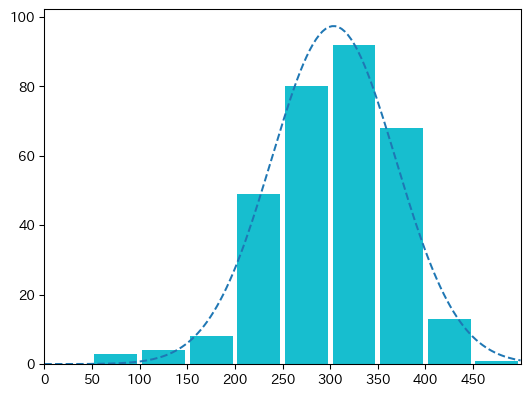

In [ ]:
target = 'score'
x_min, x_max = 0, 500
j = 5
k = 50
bins = 10

plt.figure(dpi=96)
plt.xlim(x_min, x_max)
d = 0.001


n = len(s_df.score)
mu = s_df.score.mean()
sig = s_df.score.std(ddof=0)

print(f'平均：　{mu:.1f}点、標準偏差：{sig:.1f}点')

_, p = stats.shapiro(s_df.score)
if p >= 0.05:
  print(f'  - p={p:.2f}')
else:
  print(f' *p={p:.2f}')


hist_data = plt.hist(s_df.score, bins=bins, color='tab:cyan', range=(x_min, x_max), rwidth=0.9)
plt.gca().set_xticks(np.arange(x_min, x_max-k+d, k))

sig = s_df.score.std(ddof=1)
nx = np.linspace(x_min, x_max+d, 150)
ny = stats.norm.pdf(nx,mu,sig)*k*len(s_df.score)
plt.plot(nx, ny, color='tab:blue', linewidth=1.5, linestyle='--')

In [ ]:
x[107,'H'].value()

1.0

In [ ]:
s_df.leader_flag.value_counts()

,count
leader_flag,
0,301
1,17


In [ ]:
s_df.support_flag.value_counts()

,count
support_flag,
0,314
1,4


In [ ]:
s_pair_df = pd.read_csv('3.school/student_pairs.csv')
s_pair_df

,student_id1,student_id2
0,118,189
1,72,50
2,314,233


In [ ]:
prob = pulp.LpProblem('ClassAssignmentProblem', pulp.LpMaximize)

S = s_df.student_id.tolist()
C = list("ABCDEFGH")

SC = [(s,c) for s in S for c in C]

x = pulp.LpVariable.dicts('x', SC, cat='Binary')

SSS = [1,2,3]
CCC = ['A','B','C']
for s,c in zip(SSS,CCC):
  prob += pulp.lpSum([x[s,c]]) == 1


#各生徒は一つのクラスに割り当てる
for s in S:
  prob += pulp.lpSum([x[s,c] for c in C]) == 1


#各クラスの生徒数は39人以上、40人以下
for c in C:
  prob += pulp.lpSum([x[s,c] for s in S]) >= 39
  prob += pulp.lpSum([x[s,c] for s in S]) <= 40

#男子生徒のリスト
S_male = [row.student_id for row in s_df.itertuples() if row.gender == 1]

#女生徒のリスト
S_female = [row.student_id for row in s_df.itertuples() if row.gender == 0]

#各クラスの男子生徒、女子生徒の人数は20人以下
for c in C:
  prob += pulp.lpSum([x[s,c] for s in S_male]) <= 20
  prob += pulp.lpSum([x[s,c] for s in S_female]) <= 20



#学力を辞書に
score = {row.student_id:row.score for row in s_df.itertuples()}

#平均の算出
score_mean = s_df['score'].mean()

#各クラスの学力試験の平均点は学年平均点±10点
for c in C:
  prob += (score_mean - 10)*pulp.lpSum([x[s,c] for s in S]) <= pulp.lpSum([x[s,c]*score[s] for s in S])
  prob += pulp.lpSum([x[s,c]*score[s] for s in S]) <= (score_mean + 10)*pulp.lpSum([x[s,c] for s in S])



#リーダー気質の生徒
S_leader = [row.student_id for row in s_df.itertuples() if row.leader_flag == 1]

#各クラスにリーダ気質の生徒を２人以上割り当てる
for c in C:
  prob += pulp.lpSum([x[s,c] for s in S_leader]) >= 2


#特別な支援が必要な生徒
S_support = [row.student_id for row in s_df.itertuples() if row.support_flag == 1]

#各クラスに支援が必要な生徒は１人以上
for c in C:
  prob += pulp.lpSum([x[s,c] for s in S_support]) <= 1


#特定ペアリスト
SS = [(row.student_id1, row.student_id2) for row in s_pair_df.itertuples()]

#特定ペアの生徒は同一クラスに割り当てない
for s1, s2 in SS:
  for c in C:
    prob += x[s1,c] + x[s2,c] <= 1


status = prob.solve()
print(status)

#最適化結果
C2Ss = {}
for c in C:
  C2Ss[c] = [s for s in S if x[s,c].value() == 1]

for c, Ss in C2Ss.items():
  print('Class:', c)
  print('Num:', len(Ss))
  print('Student',Ss)

1
Class: A
Num: 39
Student [1, 24, 30, 32, 36, 49, 59, 71, 72, 94, 98, 111, 129, 133, 135, 143, 149, 155, 161, 166, 178, 180, 188, 192, 195, 196, 215, 227, 234, 244, 279, 288, 294, 295, 304, 308, 309, 310, 315]
Class: B
Num: 40
Student [2, 18, 22, 25, 37, 44, 45, 47, 78, 81, 88, 93, 105, 107, 109, 113, 114, 119, 123, 127, 141, 150, 154, 172, 205, 207, 223, 226, 239, 241, 247, 250, 252, 268, 271, 277, 281, 286, 302, 305]
Class: C
Num: 40
Student [3, 23, 26, 39, 41, 50, 51, 56, 64, 65, 67, 73, 75, 83, 87, 89, 91, 96, 97, 121, 124, 128, 138, 147, 148, 165, 168, 175, 183, 197, 203, 214, 224, 235, 242, 260, 275, 298, 299, 311]
Class: D
Num: 39
Student [4, 5, 8, 12, 15, 19, 20, 40, 46, 60, 62, 63, 66, 70, 84, 86, 104, 112, 115, 130, 132, 142, 153, 160, 167, 173, 174, 179, 182, 186, 201, 218, 253, 264, 276, 280, 289, 303, 312]
Class: E
Num: 40
Student [7, 13, 29, 33, 38, 43, 52, 55, 57, 58, 74, 77, 90, 95, 99, 100, 101, 106, 125, 134, 136, 191, 193, 202, 204, 206, 209, 232, 243, 248, 258, 263

#数理モデルの検証

In [ ]:
for s in S:
  assigned_class = [x[s,c].value() for c in C if x[s,c].value() == 1]

  if len(assigned_class) != 1:
    print('error')

In [ ]:
result_df = s_df.copy()

S2C = {s:c for s in S for c in C if x[s,c].value() == 1}

result_df['assigned_class'] = result_df['student_id'].map(S2C)
result_df

,student_id,gender,leader_flag,support_flag,score,assigned_class
0,1,0,0,0,335,A
1,2,1,0,0,379,B
2,3,0,0,0,350,C
3,4,0,0,0,301,D
4,5,1,0,0,317,D
...,...,...,...,...,...,...
313,314,0,0,0,244,H
314,315,1,0,0,309,A
315,316,0,0,0,239,G
316,317,1,0,0,356,F


In [ ]:
result_df.groupby('assigned_class')['student_id'].count()

,student_id
assigned_class,
A,39
B,40
C,40
D,39
E,40
F,40
G,40
H,40


In [ ]:
result_df.groupby(['assigned_class','gender'])['student_id'].count()

assigned_class  gender
A               0         20
                1         19
B               0         20
                1         20
C               0         20
                1         20
D               0         20
                1         19
E               0         20
                1         20
F               0         20
                1         20
G               0         20
                1         20
H               0         20
                1         20
Name: student_id, dtype: int64

In [ ]:
result_df.groupby('assigned_class')['score'].mean()

,score
assigned_class,
A,300.282051
B,297.550000
C,294.925000
D,304.153846
E,312.700000
F,308.375000
G,298.350000
H,312.750000


In [ ]:
result_df.groupby('assigned_class')['leader_flag'].sum()

,leader_flag
assigned_class,
A,2
B,2
C,2
D,2
E,3
F,2
G,2
H,2


In [ ]:
result_df.groupby('assigned_class')['support_flag'].sum()

,support_flag
assigned_class,
A,0
B,1
C,0
D,1
E,1
F,1
G,0
H,0


In [ ]:
for i, (s1, s2) in enumerate(SS):
  print('case:', i)
  c1 = S2C[s1]
  c2 = S2C[s2]
  print(f's1: {s1}-{c1}')
  print(f's2: {s2}-{c2}')
  print("")

case: 0
s1: 118-H
s2: 189-G

case: 1
s1: 72-A
s2: 50-C

case: 2
s1: 314-H
s2: 233-G



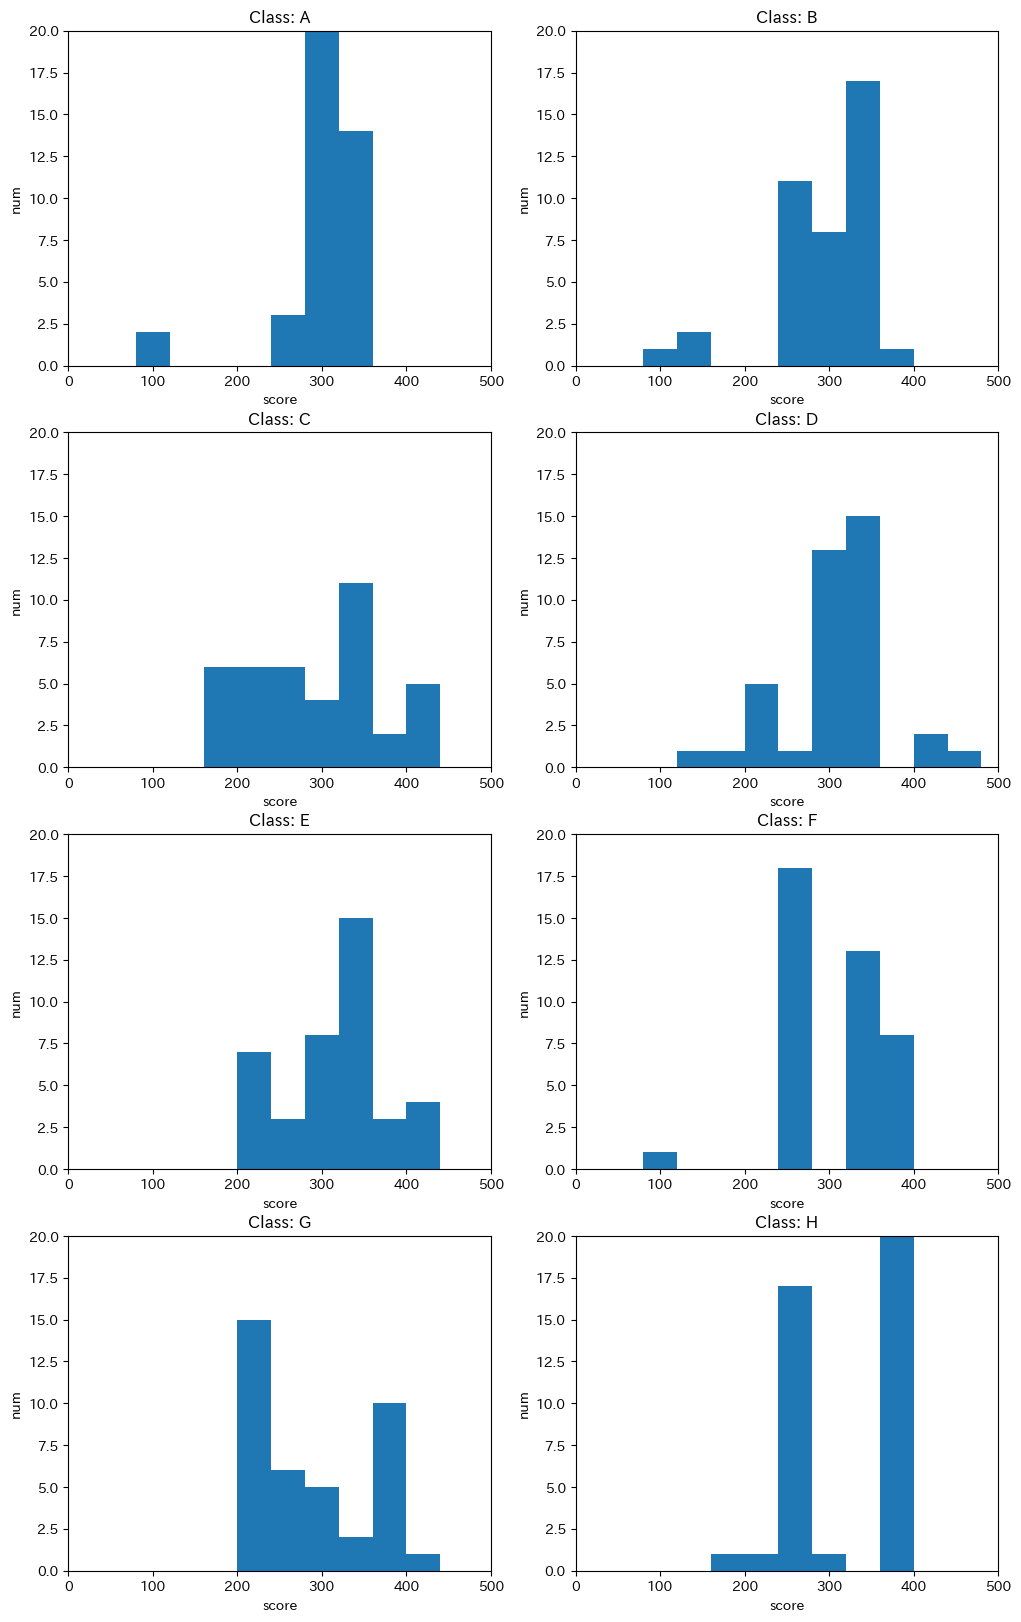

In [ ]:
fig = plt.figure(figsize=(12,20))
for i, c in enumerate(C):
  cls_df = result_df[result_df['assigned_class'] == c]
  ax = fig.add_subplot(4
                       , 2
                       , i+1
                       , xlabel='score'
                       , ylabel='num'
                       , xlim=(0,500)
                       , ylim=(0,20)
                       , title=f'Class: {c}')
  ax.hist(cls_df['score'], bins=range(0,500,40))




In [ ]:
#初期クラス構成のデータ作成

s_df['score_rank'] = s_df['score'].rank(ascending=False, method='first')
s_df

,student_id,gender,leader_flag,support_flag,score,score_rank
0,1,0,0,0,335,109.0
1,2,1,0,0,379,38.0
2,3,0,0,0,350,79.0
3,4,0,0,0,301,172.0
4,5,1,0,0,317,147.0
...,...,...,...,...,...,...
313,314,0,0,0,244,263.0
314,315,1,0,0,309,162.0
315,316,0,0,0,239,272.0
316,317,1,0,0,356,63.0


In [ ]:
class_dic = {}
for a, b in zip(range(8), list('ABCDEFGH')):
  class_dic[a] = b
class_dic

{0: 'A', 1: 'B', 2: 'C', 3: 'D', 4: 'E', 5: 'F', 6: 'G', 7: 'H'}

In [ ]:
s_df['init_assigned_class'] = s_df['score_rank'].map(lambda x: x % 8).map(class_dic)
s_df

,student_id,gender,leader_flag,support_flag,score,score_rank,init_assigned_class
0,1,0,0,0,335,109.0,F
1,2,1,0,0,379,38.0,G
2,3,0,0,0,350,79.0,H
3,4,0,0,0,301,172.0,E
4,5,1,0,0,317,147.0,D
...,...,...,...,...,...,...,...
313,314,0,0,0,244,263.0,H
314,315,1,0,0,309,162.0,C
315,316,0,0,0,239,272.0,A
316,317,1,0,0,356,63.0,H


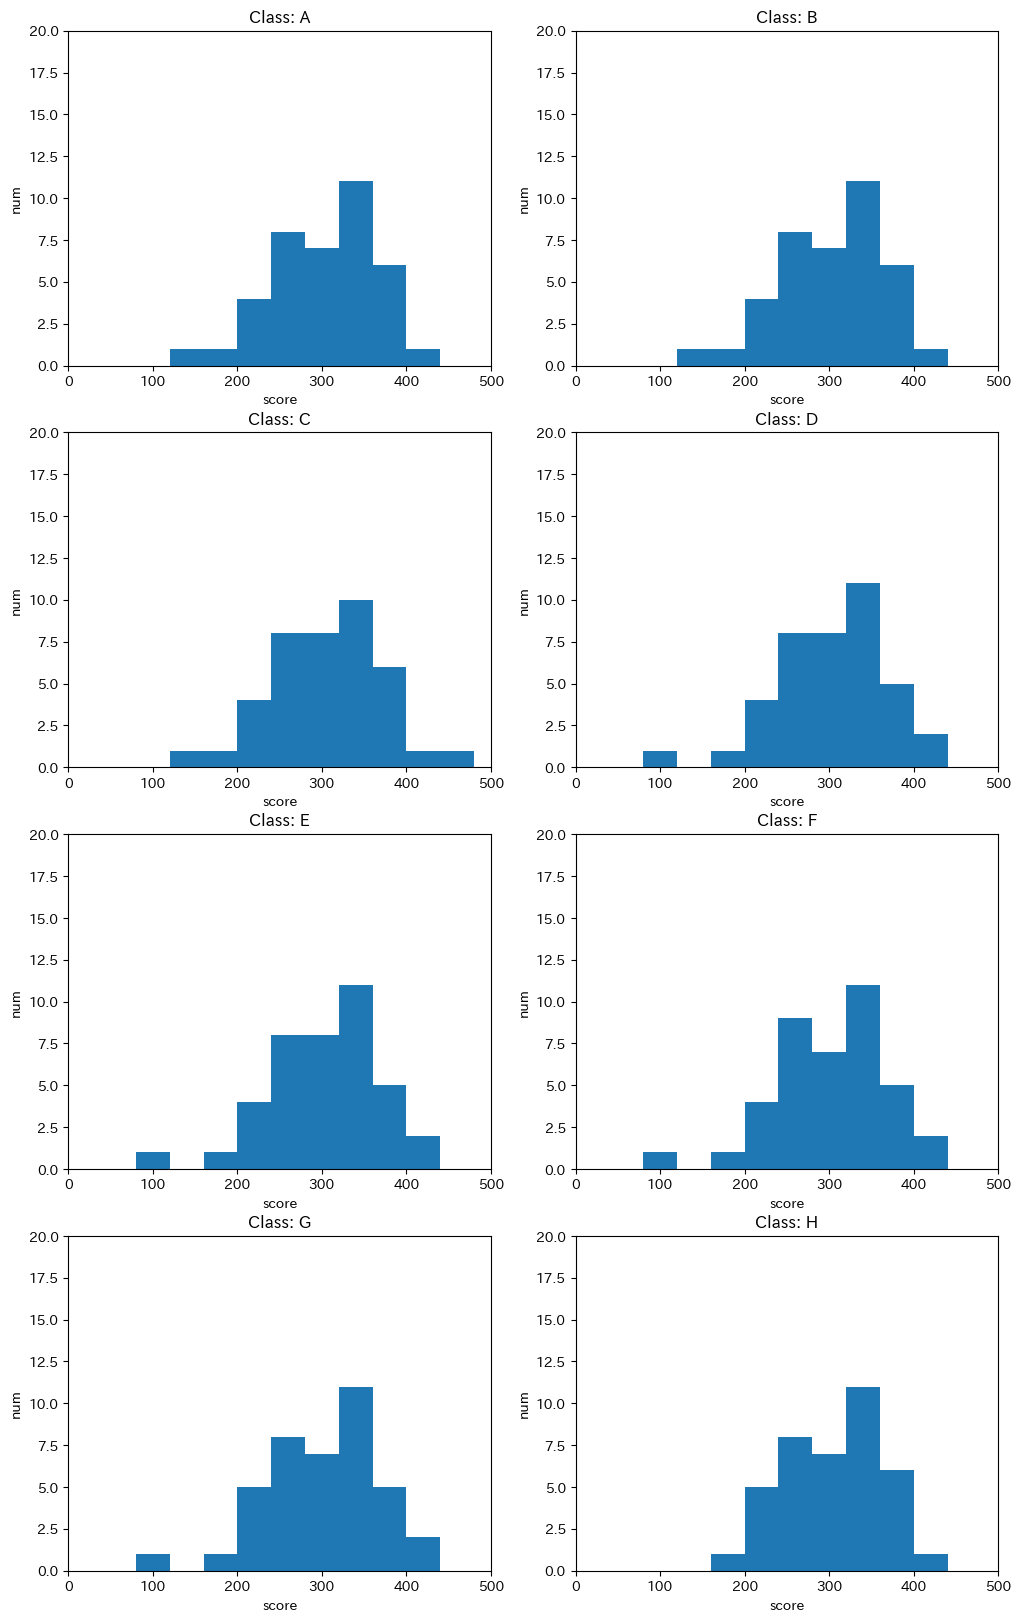

In [ ]:
fig = plt.figure(figsize=(12,20))
for i, c in enumerate(C):
  cls_df = s_df[s_df['init_assigned_class'] == c]
  ax = fig.add_subplot(4
                       , 2
                       , i+1
                       , xlabel='score'
                       , ylabel='num'
                       , xlim=(0,500)
                       , ylim=(0,20)
                       , title=f'Class: {c}')
  ax.hist(cls_df['score'], bins=range(0,500,40))

In [ ]:
init_flag = {(s,c): 0 for s in S for c in C}
for row in s_df.itertuples():
  init_flag[row.student_id, row.init_assigned_class] = 1

In [ ]:
prob = pulp.LpProblem('ClassAssignmentProblem_2', pulp.LpMaximize)

S = s_df.student_id.tolist()
C = list("ABCDEFGH")

SC = [(s,c) for s in S for c in C]

x = pulp.LpVariable.dicts('x', SC, cat='Binary')

prob += pulp.lpSum([x[1, 'H']]) == 1

#各生徒は一つのクラスに割り当てる
for s in S:
  prob += pulp.lpSum([x[s,c] for c in C]) == 1


#各クラスの生徒数は39人以上、40人以下
for c in C:
  prob += pulp.lpSum([x[s,c] for s in S]) >= 39
  prob += pulp.lpSum([x[s,c] for s in S]) <= 40

#男子生徒のリスト
S_male = [row.student_id for row in s_df.itertuples() if row.gender == 1]

#女生徒のリスト
S_female = [row.student_id for row in s_df.itertuples() if row.gender == 0]

#各クラスの男子生徒、女子生徒の人数は20人以下
for c in C:
  prob += pulp.lpSum([x[s,c] for s in S_male]) <= 20
  prob += pulp.lpSum([x[s,c] for s in S_female]) <= 20



#学力を辞書に
score = {row.student_id:row.score for row in s_df.itertuples()}

#平均の算出
score_mean = s_df['score'].mean()

#各クラスの学力試験の平均点は学年平均点±10点
for c in C:
  prob += (score_mean - 10)*pulp.lpSum([x[s,c] for s in S]) <= pulp.lpSum([x[s,c]*score[s] for s in S])
  prob += pulp.lpSum([x[s,c]*score[s] for s in S]) <= (score_mean + 10)*pulp.lpSum([x[s,c] for s in S])



#リーダー気質の生徒
S_leader = [row.student_id for row in s_df.itertuples() if row.leader_flag == 1]

#各クラスにリーダ気質の生徒を２人以上割り当てる
for c in C:
  prob += pulp.lpSum([x[s,c] for s in S_leader]) >= 2


#特別な支援が必要な生徒
S_support = [row.student_id for row in s_df.itertuples() if row.support_flag == 1]

#各クラスに支援が必要な生徒は１人以上
for c in C:
  prob += pulp.lpSum([x[s,c] for s in S_support]) <= 1


#特定ペアリスト
SS = [(row.student_id1, row.student_id2) for row in s_pair_df.itertuples()]

#特定ペアの生徒は同一クラスに割り当てない
for s1, s2 in SS:
  for c in C:
    prob += x[s1,c] + x[s2,c] <= 1

prob += pulp.lpSum([x[s,c]*init_flag[s,c] for s, c in SC])


status = prob.solve()
print(status)

#最適化結果
C2Ss = {}
for c in C:
  C2Ss[c] = [s for s in S if x[s,c].value() == 1]

for c, Ss in C2Ss.items():
  print('Class:', c)
  print('Num:', len(Ss))

1
Class: A
Num: 40
Class: B
Num: 39
Class: C
Num: 40
Class: D
Num: 40
Class: E
Num: 39
Class: F
Num: 40
Class: G
Num: 40
Class: H
Num: 40


In [ ]:
s_df

,student_id,gender,leader_flag,support_flag,score,score_rank,init_assigned_class
0,1,0,0,0,335,109.0,F
1,2,1,0,0,379,38.0,G
2,3,0,0,0,350,79.0,H
3,4,0,0,0,301,172.0,E
4,5,1,0,0,317,147.0,D
...,...,...,...,...,...,...,...
313,314,0,0,0,244,263.0,H
314,315,1,0,0,309,162.0,C
315,316,0,0,0,239,272.0,A
316,317,1,0,0,356,63.0,H


In [ ]:
result_df = s_df.copy()

S2C = {s:c for s in S for c in C if x[s,c].value() == 1}

result_df['assigned_class'] = result_df['student_id'].map(S2C)
result_df

,student_id,gender,leader_flag,support_flag,score,score_rank,init_assigned_class,assigned_class
0,1,0,0,0,335,109.0,F,H
1,2,1,0,0,379,38.0,G,A
2,3,0,0,0,350,79.0,H,H
3,4,0,0,0,301,172.0,E,E
4,5,1,0,0,317,147.0,D,D
...,...,...,...,...,...,...,...,...
313,314,0,0,0,244,263.0,H,G
314,315,1,0,0,309,162.0,C,C
315,316,0,0,0,239,272.0,A,A
316,317,1,0,0,356,63.0,H,H


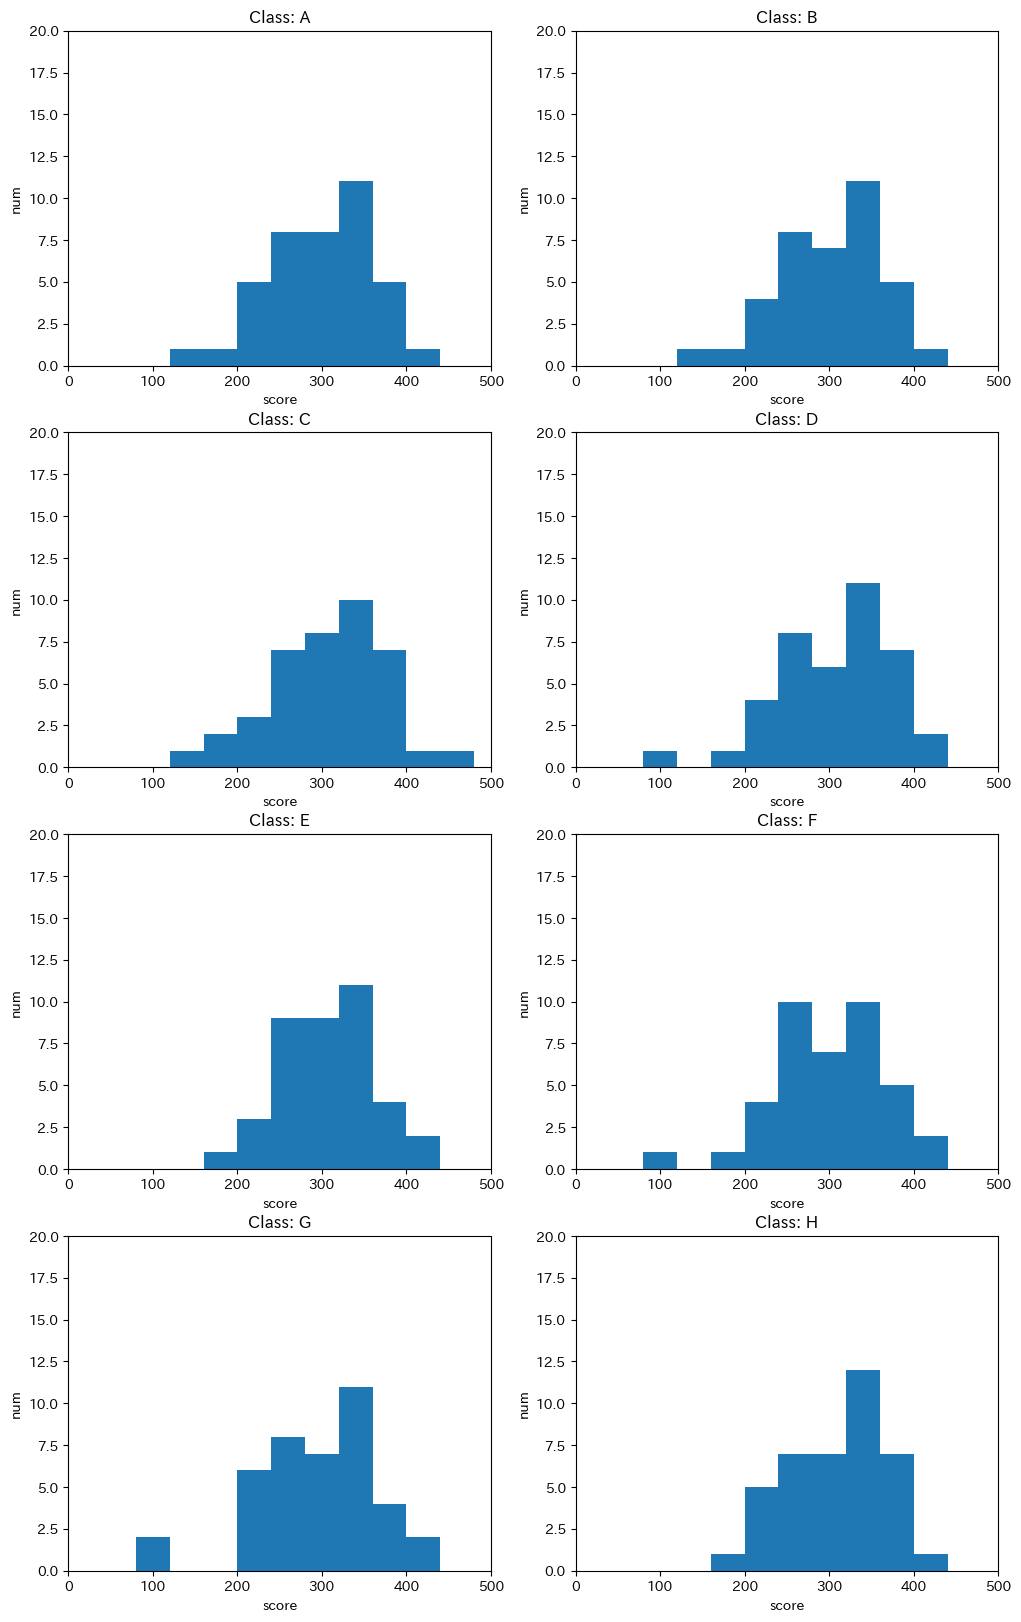

In [ ]:
fig = plt.figure(figsize=(12,20))
for i, c in enumerate(C):
  cls_df = result_df[result_df['assigned_class'] == c]
  ax = fig.add_subplot(4
                       , 2
                       , i+1
                       , xlabel='score'
                       , ylabel='num'
                       , xlim=(0,500)
                       , ylim=(0,20)
                       , title=f'Class: {c}')
  ax.hist(cls_df['score'], bins=range(0,500,40))